In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import linear_model

# Loading DataFrame into df variable

In [2]:
# change work directory
os.chdir('E://datascience packages//multi linear regression')

In [3]:
# import dataset
df = pd.read_csv('50_Startups.csv')

# Display starting 5 rows with all columns

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.skew()

R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

In [7]:
df.kurt()

R&D Spend         -0.761465
Administration     0.225071
Marketing Spend   -0.671701
Profit            -0.063859
dtype: float64

# Creating Dummies and keeping n-1 column.

In [22]:
df = pd.get_dummies(df,columns = ['State'], drop_first = True)


In [23]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


# EDA processing
## finding mean, median, standard deviation min, max, 25%, 50%, 75% distribution etc.

In [24]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000


## Finding variance of each columns

In [26]:
# variance of all columns
df.loc[:,:].var()

R&D Spend          2.107017e+09
Administration     7.849973e+08
Marketing Spend    1.495492e+10
Profit             1.624588e+09
State_Florida      2.220408e-01
State_New York     2.289796e-01
dtype: float64

## visualization technique
### 1. Histogram
### 2. Boxplot
### 3. Scatter plot

In [27]:
hist_plot = list(set(df.columns).difference(set(['multi_yes','cd_yes','premium_yes'])))

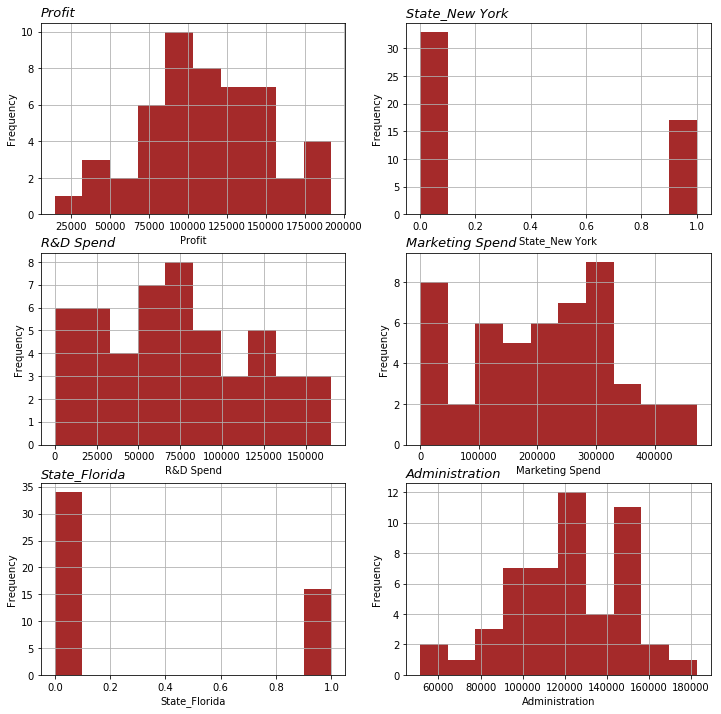

In [29]:
i,j = 0,0
f, axes = plt.subplots(3, 2, figsize = (12,12))
for column in hist_plot:
    f = df[column].hist(color = 'brown', ax = axes[i,j])
    axes[i,j].set_title(column, style = 'italic', loc = 'left', fontsize = 13)
    axes[i,j].set_xlabel(column, size = 10)
    axes[i,j].set_ylabel('Frequency', size = 10)
    if j == 1:
        j = 0
        i += 1
    else:
        j += 1

## Profit:
#### profit lies between 58000 - 170000 and shows positive significance
## State_New York:
#### histogram explains that profit from New York is more than Florida though all process remains the same.
## R&D Spend:
#### Spending or investing at R&D is almost fair but near 75000 has highest frequency.
## Marketing Spend:
#### it tell that data has no outliers and maximum of data between 950000 - 340000 has highest frequency.
## Administration:
#### it seems to have outlier but still it is not clear


## BoxPlot:


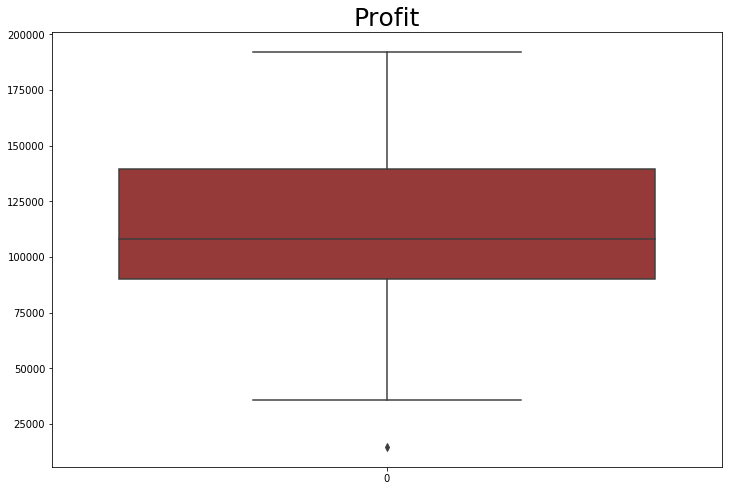

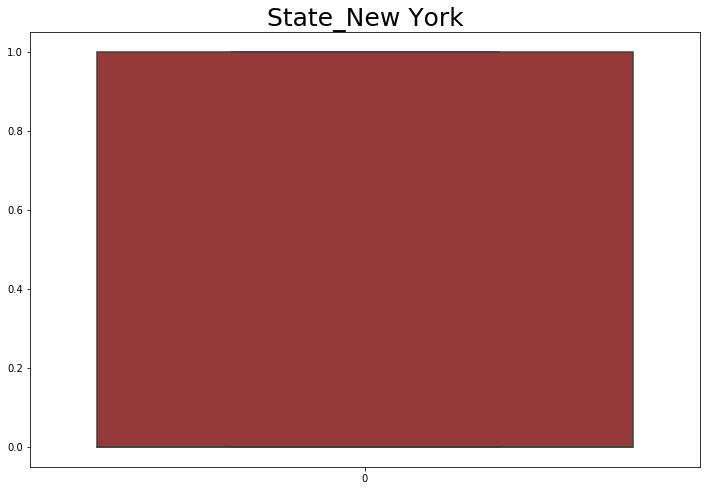

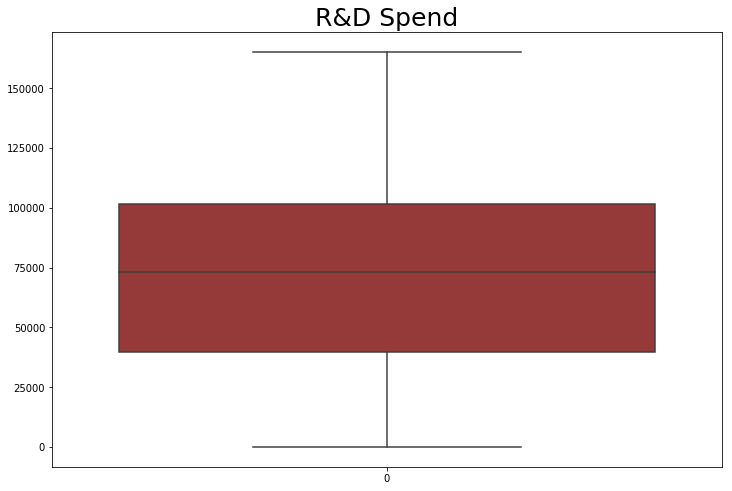

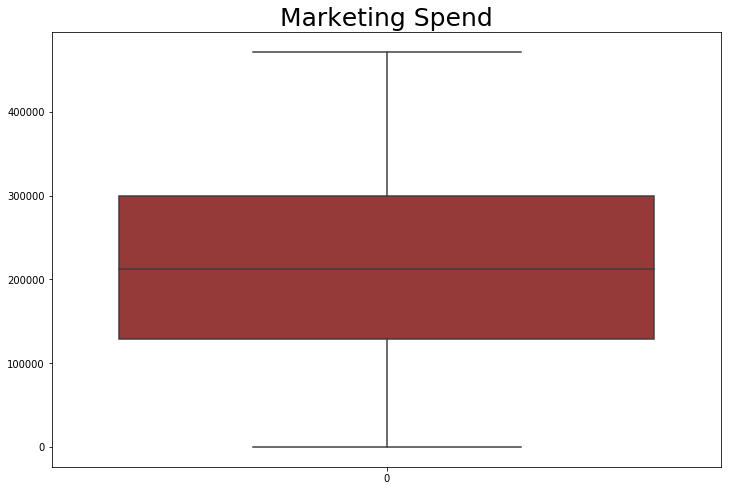

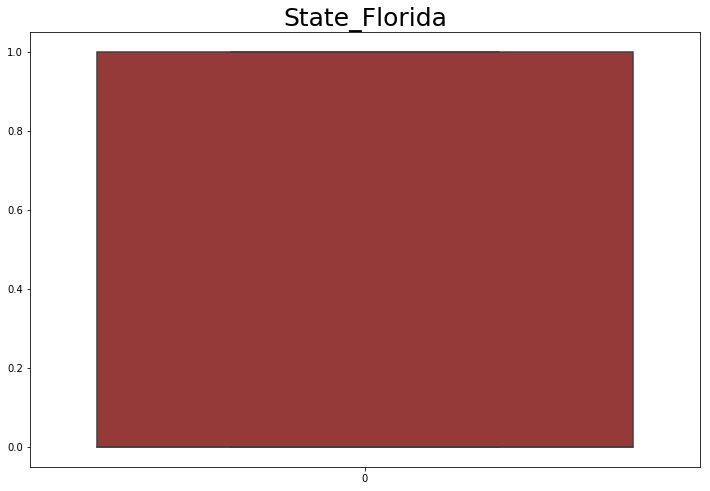

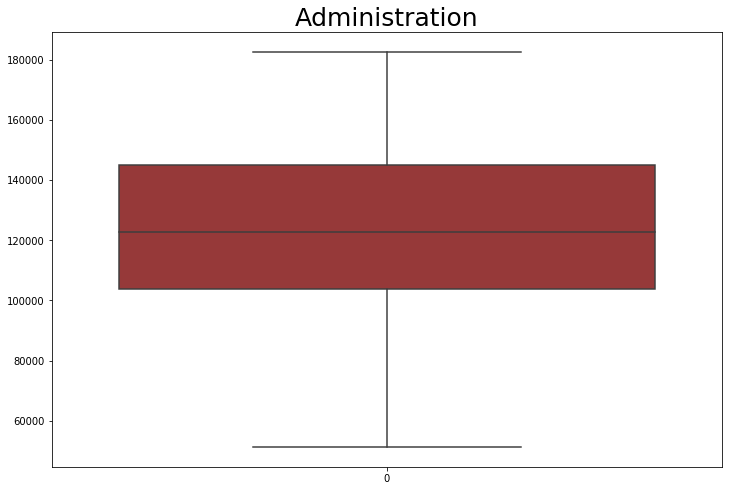

In [47]:
for column in hist_plot:
    fi , axes = plt.subplots(figsize = (12,8))        
    fi = sns.boxplot(data = df[column], ax = axes
                     , color = 'brown')
    plt.title(column, fontsize = 25)

#### Looking at all the columns, profit boxplot seems to have outlier below lower whisker at 12500. Remaining all the columns is free from outliers.

## Scatter Plot :

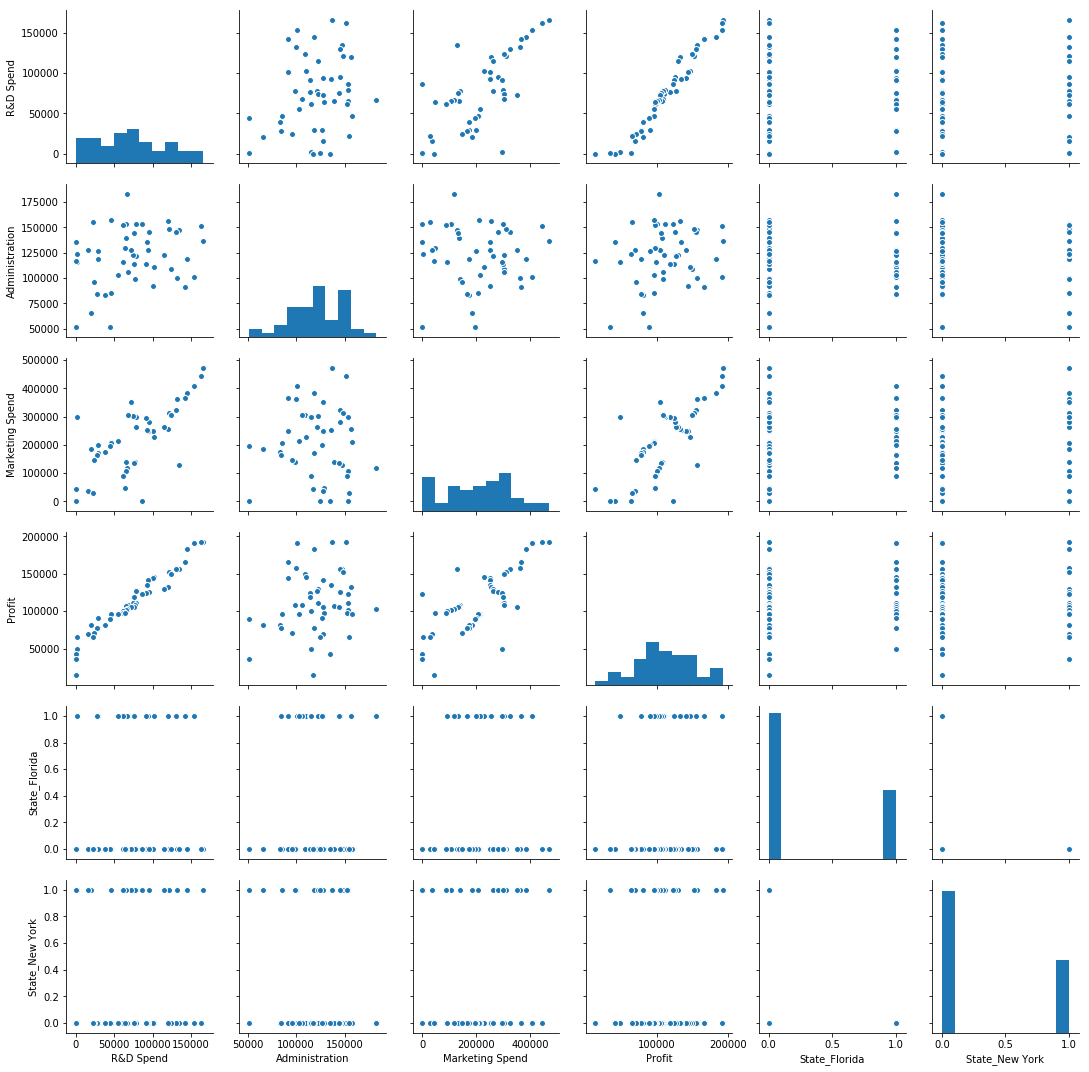

In [48]:
sns.pairplot(df)

Text(0.5,1,'data frame correlation')

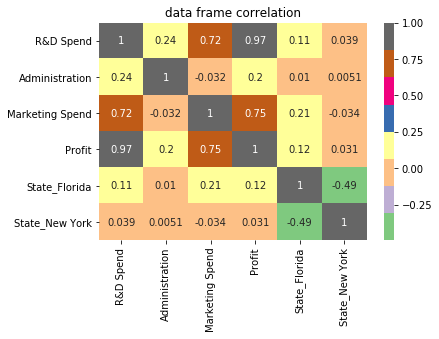

In [50]:
plt.figure()
sns.heatmap(df.corr(), annot= True, cmap= 'Accent')
plt.title('data frame correlation')

In [51]:
import statsmodels.formula.api as smf

In [56]:
df.rename(columns = {'R&D Spend': 'rdspend', 'Administration':'admin','Marketing Spend':'marketspend','State_Florida':'florida','State_New York':'newyork'}, inplace = True)


In [57]:
ml1 = smf.ols('Profit ~ rdspend + admin + marketspend + florida + newyork', data = df).fit()

In [58]:
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 09 Jun 2019   Prob (F-statistic):           1.34e-27
Time:                        01:33:42   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
rdspend         0.8060      0.046     17.369      0.000       0.712       0.900
admin          -0.0270      0.052     -0.517      0.608      -0.132       0.078
marketspend     0.0270      0.017      1.574      0.123      -0.008       0.062
florida       198.7888   3371.007      0.059      0.953   -6595.030    6992.607
newyork       -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
ml_rdspend = smf.ols('Profit ~ rdspend', data = df).fit()
ml_rdspend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 09 Jun 2019   Prob (F-statistic):           3.50e-32
Time:                        01:34:51   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
rdspend        0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
ml_admin = smf.ols('Profit ~ admin', data = df).fit()
ml_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 09 Jun 2019   Prob (F-statistic):              0.162
Time:                        01:35:10   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
ml_market = smf.ols('Profit ~ marketspend', data = df).fit()
ml_market.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 09 Jun 2019   Prob (F-statistic):           4.38e-10
Time:                        01:35:32   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept        6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
marketspend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
ml_florida = smf.ols('Profit ~ florida', data = df).fit()
ml_florida.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Sun, 09 Jun 2019   Prob (F-statistic):              0.421
Time:                        01:35:51   Log-Likelihood:                -600.31
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.088e+05   6936.739     15.689      0.000    9.49e+04    1.23e+05
florida     9943.2135   1.23e+04      0.811      0.421   -1.47e+04    3.46e+04
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
ml_newyork = smf.ols('Profit ~ newyork', data = df).fit()
ml_newyork.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Sun, 09 Jun 2019   Prob (F-statistic):              0.829
Time:                        01:36:12   Log-Likelihood:                -600.63
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.111e+05   7085.628     15.682      0.000    9.69e+04    1.25e+05
newyork     2642.1322   1.22e+04      0.217      0.829   -2.18e+04    2.71e+04
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         2.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

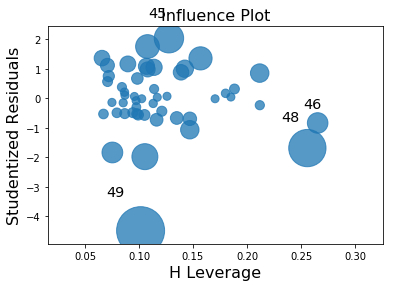

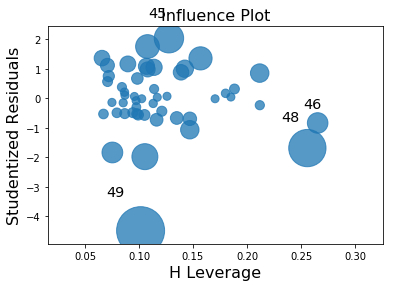

In [65]:
import statsmodels.api as sm
sm.graphics.influence_plot(ml1)

In [67]:
new_df = df.drop(df.index[[49,48,46]])

In [68]:
ml_1 = smf.ols('Profit ~ rdspend + admin + marketspend + florida + newyork', data = new_df).fit()
ml_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sun, 09 Jun 2019   Prob (F-statistic):           7.33e-28
Time:                        01:38:10   Log-Likelihood:                -482.58
No. Observations:                  47   AIC:                             977.2
Df Residuals:                      41   BIC:                             988.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.845e+04   6101.960      9.579      0.000    4.61e+04    7.08e+04
rdspend         0.7646      0.042     18.275      0.000       0.680       0.849
admin          -0.0525      0.045     -1.157      0.254      -0.144       0.039
marketspend     0.0254      0.015      1.669      0.103      -0.005       0.056
florida      -611.7470   2730.032     -0.224      0.824   -6125.158    4901.664
newyork      -620.5791   2662.021     -0.233      0.817   -5996.639    4755.481
==============================================================================
Omnibus:                        0.364   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.834   Jarque-Bera (JB):                0.531
Skew:                           0.062   Prob(JB):                        0.767
Kurtosis:                       2.494   Cond. No.                     1.60e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
rrd_model = smf.ols('rdspend ~ admin + marketspend + florida + newyork', data = new_df).fit().rsquared
vif_rdspend = 1/(1 - rrd_model)
vif_rdspend 

2.712089549315775

In [70]:
rrd_model = smf.ols('admin ~ rdspend + marketspend + florida + newyork', data = new_df).fit().rsquared
vif_admin = 1/(1-rrd_model)
vif_admin

1.237395211956454

In [71]:
rmarket_model = smf.ols('marketspend ~ admin + rdspend + florida + newyork', data  = new_df).fit().rsquared
vif_market = 1/(1-rmarket_model)
vif_market

2.7092939446787114

In [72]:
rflori_model = smf.ols('florida ~ admin + marketspend + rdspend + newyork', data = new_df).fit().rsquared
vif_florida = 1/(1-rflori_model)
vif_florida

1.368293909309462

In [73]:
rnewyork_model = smf.ols('newyork ~ admin + marketspend + florida + rdspend', data = new_df).fit().rsquared
vif_newyork = 1/(1-rnewyork_model)
vif_newyork

1.3443341354962195

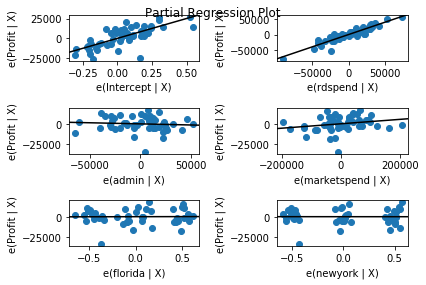

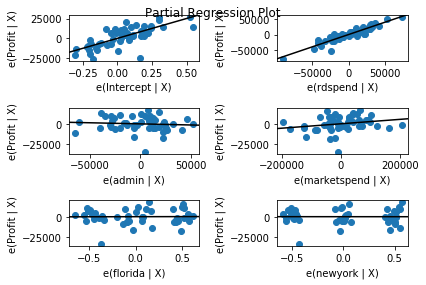

In [76]:
sm.graphics.plot_partregress_grid(ml1)

In [78]:
final_model = smf.ols('Profit ~ rdspend + marketspend + admin + newyork + florida', data = df).fit()
final_model.params
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 09 Jun 2019   Prob (F-statistic):           1.34e-27
Time:                        01:44:21   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
rdspend         0.8060      0.046     17.369      0.000       0.712       0.900
marketspend     0.0270      0.017      1.574      0.123      -0.008       0.062
admin          -0.0270      0.052     -0.517      0.608      -0.132       0.078
newyork       -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
florida       198.7888   3371.007      0.059      0.953   -6595.030    6992.607
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
profit_pred = final_model.predict(df[['marketspend','rdspend','admin','florida','newyork']])


In [82]:
resid = pd.DataFrame(pd.Series(df['Profit'] - profit_pred))
resid
resid.mean()

0    1.382822e-07
dtype: float64

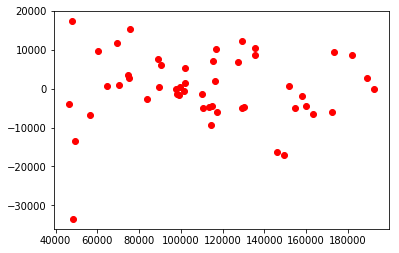

In [83]:
plt.scatter(x = profit_pred, y = resid, color = 'red') # residuals vs fitted value

In [84]:
stdresidual = pd.DataFrame(final_model.resid_pearson) # pearson validation
stdresidual

,0
0,-0.013639
1,0.288238
2,0.929549
3,0.987055
4,-0.645096
5,-0.686783
6,-0.209423
7,-0.466463
8,0.061131
9,-0.537090


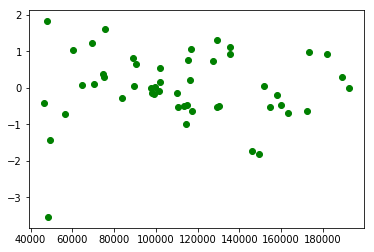

In [85]:
plt.scatter(x = profit_pred, y = stdresidual, color = 'green')

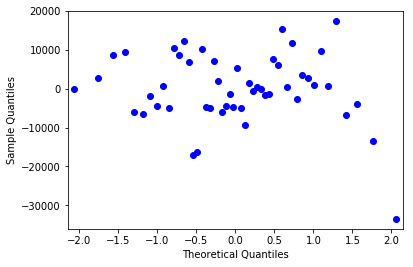

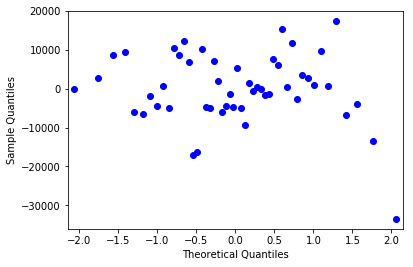

In [86]:
sm.qqplot(resid)


# End of Regression

In [74]:
#concat_dummies = start.State.value_counts()
#pd.concat([start, concat_dummies], axis = 1)

In [75]:
#concat_dummies

#start.rename(columns = {'R&D Spend': 'rdspend', 'Administration':'admin','Marketing Spend':'marketspend','State_Florida':'florida','State_New York':'newyork','State_California':'california'}, inplace = True)

In [101]:
#start.head()

In [66]:
#start_up.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [100]:
# it simply tells about all the types of data types for each columns
#start_up.info()

In [11]:
# shape of data
#start_up.shape

(50, 5)

In [16]:
# this code basically used for dropping unimportant column 
# drop_columns = ['column_1_name'[, 'column_2_name',............]]
# cars = cars.drop(drop_columns, axis = 1)

In [17]:
# this code is used for removing duplicate is rows
# cars = cars.drop_duplicates(keep = 'first')

In [99]:
# summary of dataset
#start.describe()

In [11]:
# sorting w.r.t the variables
#start_sort = start.sort_values(by = 'Profit', ascending = False).head()
#start_sort.head(49)

,rdspend,admin,marketspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
#start_sort = start_up.sort_values(by = 'Marketing Spend', ascending = True).head()
#start_sort.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
19,86419.70,153514.11,0.00,New York,122776.86
45,1000.23,124153.04,1903.93,New York,64926.08
44,22177.74,154806.14,28334.72,California,65200.33


In [16]:
#def min_max_values(col):
#    top = start_up[col].idxmax()
 #   top_obs = pd.DataFrame(start_up.loc[top])
    
  #  bottom = start_up[col].idxmin()
   # bottom_obs = pd.DataFrame(start_up.loc[bottom])
    
    #min_max_obs = pd.concat([top_obs, bottom_obs], axis = 1)
    
   # return min_max_obs

In [17]:
#min_max_values('Profit')

,0,49
R&D Spend,165349,0
Administration,136898,116984
Marketing Spend,471784,45173.1
State,New York,California
Profit,192262,14681.4


In [24]:
#start

,rdspend,admin,marketspend,Profit,california,florida,newyork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [98]:
# histogram of cars data set
#num_bins = 10
#plt.hist(start['rdspend'])

In [97]:
#plt.hist(start['Profit'])

In [96]:
#plt.hist(start["marketspend"])


In [95]:

#plt.hist(start['admin'])

In [94]:
# probability distribution function
#sns.distplot(start['Profit'])

In [93]:
# count by categories - cross tabulates
#make_distribution = start.groupby('florida').size()

In [92]:
#make_distribution

In [91]:
# distribution of categorical variables
#make_distribution.plot(title= 'Make distribution')

In [38]:
# select all numerical variables
#make_distribution

florida
0    34
1    16
dtype: int64

In [38]:
# creating dummy for given categorical data set 
#dataframe['new_variable_name'] = dataframe.current_var_name.map({'key1': 0 or 1,['key2': 0 or 1,...........]})  

In [ ]:
#make_distribtion['state_dummy'] = make_distribution.State.map({})

In [40]:
#pd.get_dummies(start_up.State)

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [43]:
# 2nd method for making dummy variables
#pd.get_dummies(start_up.State)
# for dropping one dummy column
#pd.get_dummies(start_up.State, prefix = 'state').iloc[:,1:]

,state_Florida,state_New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0


In [26]:
# concatination of dummy variables
#concat_dummies = start_up.State.value_counts()
#concat_dummies

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [27]:
# continuous for concatination
#pd.concat([start_up, concat_dummies], axis = 1) # axis = 0 means row and axis = 1 means columns


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\range.py:465: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return self._int64index.union(other)


,R&D Spend,Administration,Marketing Spend,State,Profit,State
0,165349.20,136897.80,471784.10,New York,192261.83,NaN
1,162597.70,151377.59,443898.53,California,191792.06,NaN
2,153441.51,101145.55,407934.54,Florida,191050.39,NaN
3,144372.41,118671.85,383199.62,New York,182901.99,NaN
4,142107.34,91391.77,366168.42,Florida,166187.94,NaN
5,131876.90,99814.71,362861.36,New York,156991.12,NaN
6,134615.46,147198.87,127716.82,California,156122.51,NaN
7,130298.13,145530.06,323876.68,Florida,155752.60,NaN
8,120542.52,148718.95,311613.29,New York,152211.77,NaN
9,123334.88,108679.17,304981.62,California,149759.96,NaN


In [40]:
#start = pd.get_dummies(start_up)

In [89]:
#start.corr()

In [40]:
#for column in start.columns:
 #   print(column)

In [88]:
#sns.pairplot(start)

In [41]:
#sns.regplot(start['marketspend'] , start['rdspend'])

In [90]:
#sns.boxplot(data = start['newyork'])

In [31]:
# for column in start.columns:
#    print(column)

r&dspend
admin
marketspend
Profit
california
florida
newyork


In [46]:
#m1 = smf.ols("Profit ~ rdspend + admin + marketspend + florida + newyork + california", data=start).fit()

In [87]:
#m1.summary()